# Libraries Import & loading the dataset

In [0]:
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Loading the data
df = pd.read_csv('googleplaystore.csv')

# Cleaning the data 

In [0]:
%matplotlib inline

In [0]:
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [0]:
df.head()
# Display first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
df.info()
# Data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

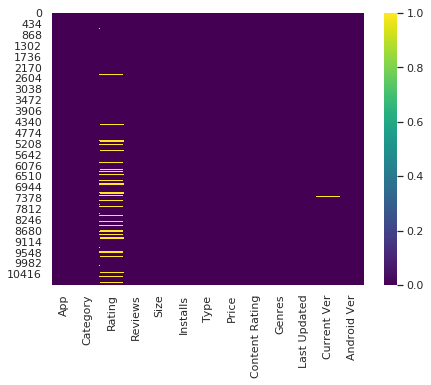

In [0]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [0]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [0]:
df['Category'].unique()
# Unique Category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [0]:
# Check the record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [0]:
df = df.drop(i)
#values are too low we drop the record instead of cleaning

In [0]:
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]
# Removing NaN values


In [0]:
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [0]:
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)
# Category features encoding

In [0]:
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])
# Genres features encoding

In [0]:
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])
# Encode Content Rating features

In [0]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))
# Price cealning

In [0]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
le = preprocessing.LabelEncoder()
df['Installs'] = le.fit_transform(df['Installs'])

**##Cleaning 2 (Installs)**

In [0]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [0]:
df['Type'] = pd.get_dummies(df['Type'])
# Type encoding

In [0]:
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))
# Last Updated encoding

In [0]:
 k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter
# Convert kbytes to Mbytes

In [0]:
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)
# Size cleaning

In [0]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6962,ART_AND_DESIGN,4.1,159,19.0,10000,1,0,1,9,1.515283e+09,1.00,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2632,ART_AND_DESIGN,3.9,967,14.0,500000,1,0,1,12,1.515974e+09,2.00,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8656,ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0,1,9,1.533082e+09,1.24,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7827,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0,4,9,1.528416e+09,0.00,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7022,ART_AND_DESIGN,4.3,967,2.8,100000,1,0,1,11,1.529453e+09,1.10,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting the data into training and testing 

In [0]:
features = ['App', 'Reviews', 'Size', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
# without size
# features = ['App', 'Reviews', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres','App']
# features.extend(category_list)

X = df[features]
y = df['Rating']
# Split data into training and testing sets

# Rating Prediciton

# Splitting the data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# Dummy Regressor

In [0]:
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

#training the Dummy Regressor.                                                             
mdlDR = DummyRegressor(strategy ="median")
mdlDR.fit(X_train,y_train)

ResultsDR = mdlDR.predict(X_test)

scoreDR = mdlDR.score(X_test,y_test) #mean_squared_error
print("error of dummy is: ", scoreDR)

#reading the mean squared error between the test data and the predict one.
metrics.mean_squared_error(y_test,ResultsDR)
#metrics.accuracy(y_test_d,ResultsDC) #accuracy of test data.

error of dummy is:  -0.23453821776357953


3.221247232472325

# Decision Tree Model

In [0]:
#Decision tree
from sklearn import tree
mdlR = tree.DecisionTreeRegressor(max_depth=100,min_samples_leaf=10,random_state = 0)
mdlR.fit(X_train,y_train)

print("train acc: ",mdlR.score(X_train,y_train))
print("test acc: ",mdlR.score(X_test,y_test))


ResultsDTR = mdlR.predict(X_test)

metrics.mean_squared_error(y_test,ResultsDTR)


train acc:  0.999968370885344
test acc:  0.9999904444912276


2.4932930990209544e-05

# KNeighbors Regressor

In [0]:
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.12%'

# Support Vector Machine

In [0]:
from sklearn import svm


model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)
accuracy = model2.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Accuracy: 92.62%'

# **Linear Regressor**

In [0]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: -0.03%'

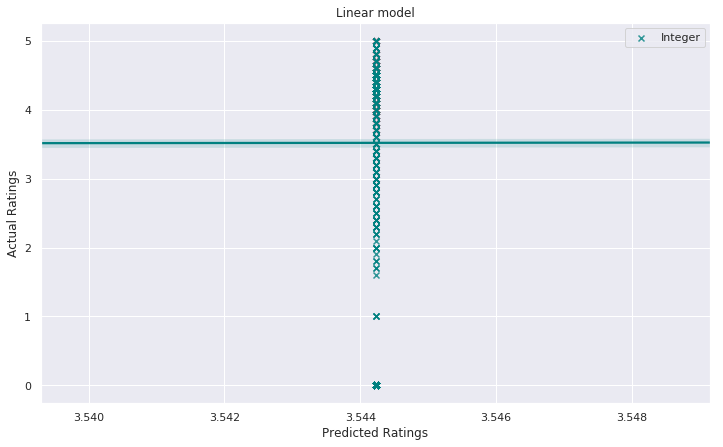

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')

plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

# ANN Model

In [0]:
normalized_X = preprocessing.scale(X_train)
normalized_y = preprocessing.scale(y_train)

normalized_X_test = preprocessing.scale(X_test)
normalized_y_test = preprocessing.scale(y_test)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPRegressor(activation='relu', solver='adam',early_stopping=True,learning_rate='adaptive',max_iter =600,tol=0.01)
tuned_params = {'hidden_layer_sizes':[(250,),(250,250),(250,250,250)]}
model = GridSearchCV(mlp,tuned_params)
model.fit(normalized_X,normalized_y)
ResultsMLP = model.predict(normalized_X_test)
print('best_params:',model.best_params_)
print("error: ", metrics.mean_squared_error(normalized_y_test,ResultsMLP))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your f

best_params: {'hidden_layer_sizes': (250, 250, 250)}
error:  0.0008587639520475485


# *Installs Prediction*

# Splitting the data

In [0]:
# features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
# features.extend(category_list)
#without size
features = ['App', 'Reviews', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)

X = df[features]
y = df['Installs']
# Split data into training and testing sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Decision Tree Regressor

In [0]:
#Decision tree
from sklearn import tree
mdlR = tree.DecisionTreeRegressor(max_depth=100,min_samples_leaf=10,random_state = 0)
mdlR.fit(X_train,y_train)

print("train acc: ",mdlR.score(X_train,y_train))
print("test acc: ",mdlR.score(X_test,y_test))


ResultsDTR = mdlR.predict(X_test)

metrics.mean_squared_error(y_test,ResultsDTR)

train acc:  0.6022183040387219
test acc:  0.5640332521674589


951936158362357.9

# Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import expon
from random import randrange
from scipy.stats import norm
import random
from sklearn.model_selection import GridSearchCV

import math

normalized_X = preprocessing.scale(X_train)
normalized_y = preprocessing.scale(y_train)

normalized_X_test = preprocessing.scale(X_test)
normalized_y_test = preprocessing.scale(y_test)

# params = mdlR.get_params()
# print(params)
param_dist = {"max_depth": [i for i in range(1,1000)],
              "min_samples_leaf": [i for i in range(1,10000)],
              "max_leaf_nodes": [i for i in range(2,10000)],
              "criterion": ["mse"]}

param_dist_1 = {"criterion":[ "mse" ]}
mdlR2 = tree.tree.DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(mdlR2,param_dist,n_iter=1000,iid="warn", refit=True)
# tree_cv = GridSearchCV(tree.DecisionTreeRegressor(),param_dist)
tree_cv.fit(normalized_X,normalized_y)

resultsCVR = tree_cv.predict(normalized_X_test)
print(tree_cv.best_params_)

print("error: ", metrics.mean_squared_error(normalized_y_test,resultsCVR))
# print("resultsCVR: ", resultsCVR)
print("score: ", tree_cv.score(normalized_X,normalized_y))
print("score2:", tree_cv.score(normalized_X_test,normalized_y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/sklearn

{'min_samples_leaf': 2, 'max_leaf_nodes': 7824, 'max_depth': 169, 'criterion': 'mse'}
error:  0.29344236982841276
score:  0.9708203021927223
score2: 0.7065576301715873


# KNeighbors Regressor

In [0]:
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'


'Accuracy: 35.44%'

# Suppor Vector Machine

In [0]:
from sklearn import svm


model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)
accuracy = model2.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Accuracy: 27.7%'

# Linear Regressor

In [0]:
from sklearn.linear_model import LinearRegression 


model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
print("train acc: ",model.score(X_train,y_train))
print("test acc: ",model.score(X_test,y_test))

train acc:  7.652933823509844e-05
test acc:  -0.000191891753080764


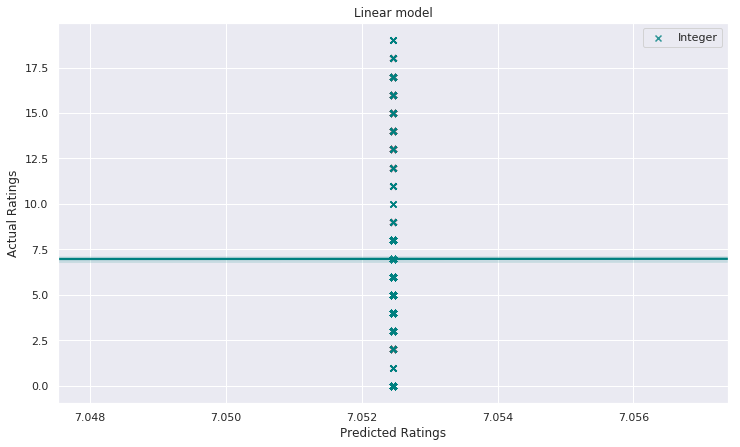

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')

plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

# ANN Model

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPRegressor(activation='relu', solver='adam',early_stopping=True,learning_rate='adaptive',max_iter =600,tol=0.01)
tuned_params = {'hidden_layer_sizes':[(250,),(250,250),(250,250,250)]}
model = GridSearchCV(mlp,tuned_params)
model.fit(normalized_X,normalized_y)
ResultsMLP = model.predict(normalized_X_test)
print('best_params:',model.best_params_)
print("error: ", metrics.mean_squared_error(normalized_y_test,ResultsMLP))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best_params: {'hidden_layer_sizes': (250, 250)}
error:  0.43448869384340233


# Cleaning for KBEST SELECT (DUMMY ENCODING)

In [0]:
df3 = pd.read_csv('googleplaystore.csv')

In [0]:
df3.dropna(inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [0]:
# Cleaning Categories into integers
CategoryString = df3["Category"]
categoryVal = df3["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df3["Category_c"] = df3["Category"].map(category_dict).astype(int)

In [0]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
      
df3["Size"] = df3["Size"].map(change_size)

#filling Size which had NA
df3.Size.fillna(method = 'ffill', inplace = True)

In [0]:
#Cleaning no of installs classification
df3['Installs'] = [int(i[:-1].replace(',','')) for i in df3['Installs']]

In [0]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df3['Type'] = df3['Type'].map(type_cat)

In [0]:
#Cleaning of content rating classification
RatingL = df3['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df3['Content Rating'] = df3['Content Rating'].map(RatingDict).astype(int)


In [0]:
#dropping of unrelated and unnecessary items
df3.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [0]:
#Cleaning of genres
GenresL = df3.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df3['Genres_c'] = df3['Genres'].map(GenresDict).astype(int)

In [0]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df3['Price'] = df3['Price'].map(price_clean).astype(float)

In [0]:
# convert reviews to numeric
df3['Reviews'] = df3['Reviews'].astype(int)

In [0]:
df4 = pd.get_dummies(df3, columns=['Category'])
print(df4.shape)

(9360, 43)


In [0]:
X_d = df4.drop(labels = ['Size','Genres','Category_c','Installs','Genres_c'],axis = 1)
y_d = df4.Installs
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2)

In [0]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k='all').fit_transform(X_d,y_d)
print(X_new.shape)
print(y_d.shape)

(9360, 38)
(9360,)


In [0]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_d, test_size = 0.3, random_state = 10)

In [0]:
#Decision tree
from sklearn import tree
mdlR = tree.DecisionTreeRegressor(max_depth=100,min_samples_leaf=10,random_state = 0)
mdlR.fit(X_train_n,y_train_n)

print("train acc: ",mdlR.score(X_train_n,y_train_n))
print("test acc: ",mdlR.score(X_test_n,y_test_n))


ResultsDTR = mdlR.predict(X_test_n)

metrics.mean_squared_error(y_test_n,ResultsDTR)

train acc:  0.7036552331519669
test acc:  0.6513046381618997


2810298608750295.5

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import expon
from random import randrange
from scipy.stats import norm
import random
from sklearn.model_selection import GridSearchCV

import math

normalized_X = preprocessing.scale(X_train_n)
normalized_y = preprocessing.scale(y_train_n)

normalized_X_test = preprocessing.scale(X_test_n)
normalized_y_test = preprocessing.scale(y_test_n)

# params = mdlR.get_params()
# print(params)
param_dist = {"max_depth": [i for i in range(1,100)],
              "min_samples_leaf": [i for i in range(1,1000)],
              "max_leaf_nodes": [i for i in range(2,1000)],
              "criterion": ["mse"]}

param_dist_1 = {"criterion":[ "mse" ]}
mdlR2 = tree.tree.DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(mdlR2,param_dist,n_iter=1000,iid="warn", refit=True)
# tree_cv = GridSearchCV(tree.DecisionTreeRegressor(),param_dist)
tree_cv.fit(normalized_X,normalized_y)

resultsCVR = tree_cv.predict(normalized_X_test)
print(tree_cv.best_params_)

print("error: ", metrics.mean_squared_error(normalized_y_test,resultsCVR))
# print("resultsCVR: ", resultsCVR)
print("score: ", tree_cv.score(normalized_X,normalized_y))
print("score2:", tree_cv.score(normalized_X_test,normalized_y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'min_samples_leaf': 6, 'max_leaf_nodes': 353, 'max_depth': 58, 'criterion': 'mse'}
error:  0.33095739293351145
score:  0.7964115220358747
score2: 0.6690426070664885
